In [10]:
# Pipeline for combining all np.sum calculations for ePix Runs 18-20
# Last ran 07/16/2025

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

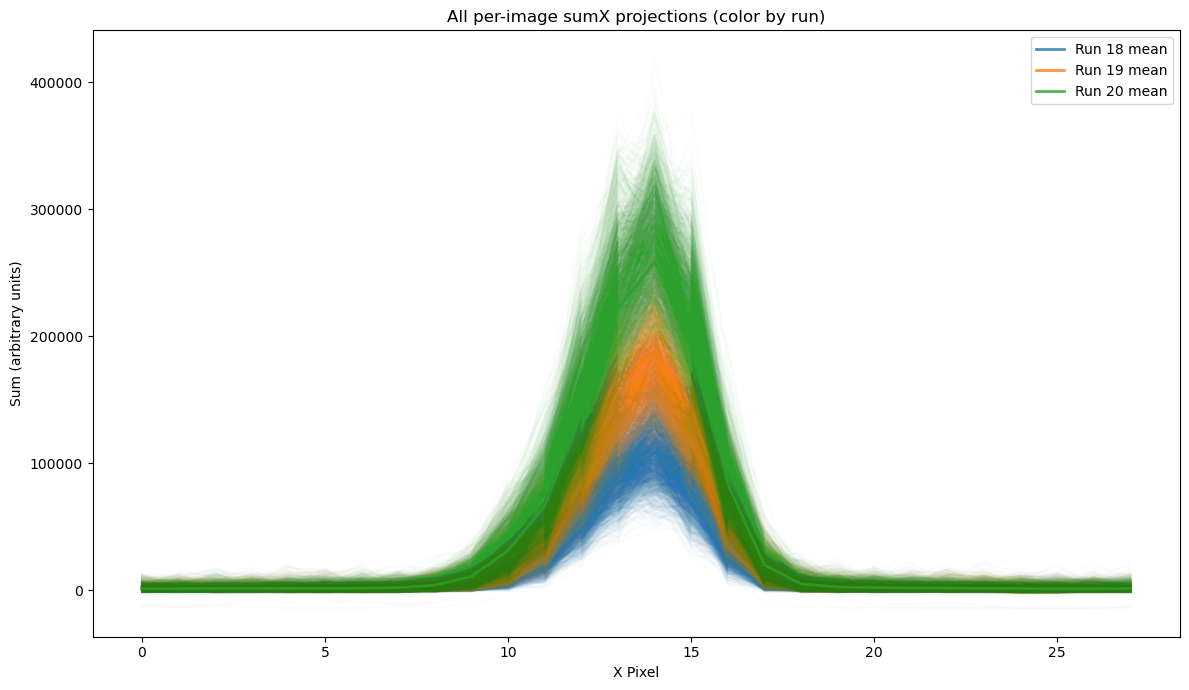

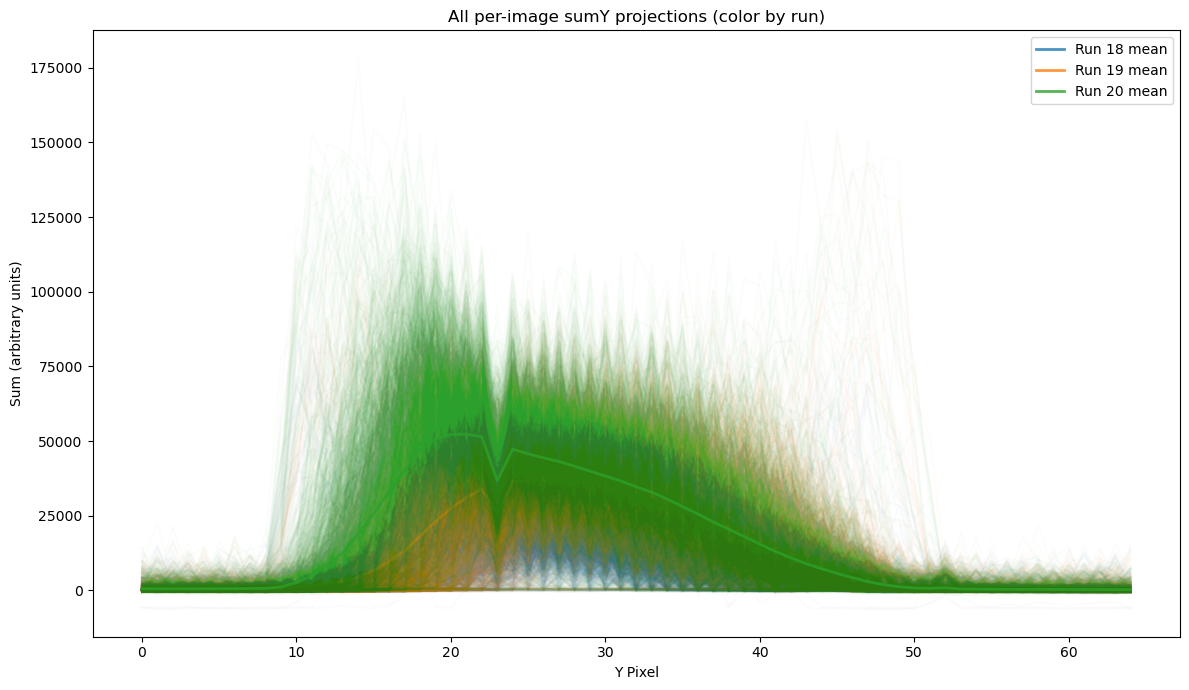

In [12]:
# --- Directory with saved .npz files ---
data_dir = "/sdf/group/rfar/timodo/ePix_Runs_Pixel_Sum_Data"

# --- Collect all relevant files ---
sumX_files = sorted([f for f in os.listdir(data_dir) if 'all_sumX' in f])
sumY_files = sorted([f for f in os.listdir(data_dir) if 'all_sumY' in f])

# --- Helper: extract run number from filename ---
def extract_run(filename):
    # Expects filenames like run_18_all_sumX.npz
    for part in filename.split('_'):
        if part.isdigit():
            return int(part)
    return None

# --- Assign colors (modern Matplotlib colormaps API) ---
import matplotlib
cmap = matplotlib.colormaps["tab10"]  # updated for modern Matplotlib
runs = sorted([extract_run(f) for f in sumX_files])
color_dict = {run: cmap(i % 10) for i, run in enumerate(runs)}

# --- Plot all sumX curves, color-coded by run ---
plt.figure(figsize=(12, 7))
for f in sumX_files:
    run = extract_run(f)
    npz = np.load(os.path.join(data_dir, f))
    x_pixels = npz["x_pixels"]
    sumX = npz["sumX"]
    color = color_dict[run]
    # Overlay every projection with low alpha
    max_curves = 2000 if sumX.shape[0] > 2000 else sumX.shape[0]
    for i in range(max_curves):
        plt.plot(x_pixels, sumX[i], color=color, alpha=0.02)
    plt.plot(x_pixels, np.mean(sumX, axis=0), color=color, alpha=0.8, linewidth=2, label=f"Run {run} mean")
plt.title("All per-image sumX projections (color by run)")
plt.xlabel("X Pixel")
plt.ylabel("Sum (arbitrary units)")
plt.legend()
plt.tight_layout()
plt.show()

# --- Plot all sumY curves, color-coded by run ---
plt.figure(figsize=(12, 7))
for f in sumY_files:
    run = extract_run(f)
    npz = np.load(os.path.join(data_dir, f))
    y_pixels = npz["y_pixels"]
    sumY = npz["sumY"]
    color = color_dict[run]
    # Overlay every projection with low alpha
    max_curves = 2000 if sumY.shape[0] > 2000 else sumY.shape[0]
    for i in range(max_curves):
        plt.plot(y_pixels, sumY[i], color=color, alpha=0.02)
    plt.plot(y_pixels, np.mean(sumY, axis=0), color=color, alpha=0.8, linewidth=2, label=f"Run {run} mean")
plt.title("All per-image sumY projections (color by run)")
plt.xlabel("Y Pixel")
plt.ylabel("Sum (arbitrary units)")
plt.legend()
plt.tight_layout()
plt.show()